## Setting up the Magic

In [1]:
# We need to join the upper directory in order to access the local modules
import os
import pickle

import json

import matplotlib.pyplot as plt
import numpy as np
import scienceplots  # noqa: F401
import seaborn as sns

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
plt.rcParams["font.family"] = "Linux Libertine O"
plt.rcParams["font.size"] = 15

In [4]:
# Reading the mat files
with open("comnets_data/gnbPositions.json") as gnb_file:
    data = json.load(gnb_file)

gNBs = np.array([data["gnb0"], data["gnb1"], data["gnb2"], data["gnb3"]])
center = gNBs[3,:]
Rba = np.array([[np.cos(np.pi/2),-np.sin(np.pi/2),center[0]],[np.sin(np.pi/2),np.cos(np.pi/2),center[1]],[0.0,0.0,1.0]])
Rab = np.linalg.inv(Rba)

gNBs = np.array([data["gnb0"], data["gnb1"], data["gnb2"], data["gnb3"]])
ggs = np.hstack((gNBs,np.ones((4,1))))
gNBs = np.matmul(Rab,ggs.T).T
gNBs = gNBs[:,0:2]

with open("comnets_data/uePositions.json") as ue_file:
    data = json.load(ue_file)

UEs = np.array(
    [data["ue0"], data["ue1"], data["ue2"], data["ue3"], data["ue4"], data["ue5"]]
)

uus = np.hstack((UEs,np.ones((6,1))))

UEs = np.matmul(Rab,uus.T).T
UEs = UEs[:,0:2]

## Comparing Non-Linear to Linear

In [5]:
frequency_mhz = 100

with open(f'comnets_data/results/experiments/4_{frequency_mhz}mhz_window_50_s_1.pickle', 'rb') as p:
        data_no_offset = pickle.load(p)

In [8]:
eelin = np.array([])
eenli = np.array([])
eidea = np.array([])

for i in range(UEs.shape[0]):
    if frequency_mhz == 40 and i == 1:
        continue
    ue = UEs[i]
    lin = data_no_offset[f'P{i}','linear']
    nli = data_no_offset[f'P{i}','nonlin'][:,0:2]
    ied = nli - (np.mean(nli,axis=0) - ue)

    elin = np.linalg.norm(ue-lin,axis=1)
    enli = np.linalg.norm(ue-nli,axis=1)
    eide = np.linalg.norm(ue-ied,axis=1)

    eelin = np.append(eelin, elin)
    eenli = np.append(eenli, enli)
    eidea = np.append(eidea, eide)

eelin = eelin[eelin < 1000]
eenli = eenli[eenli < 1000]

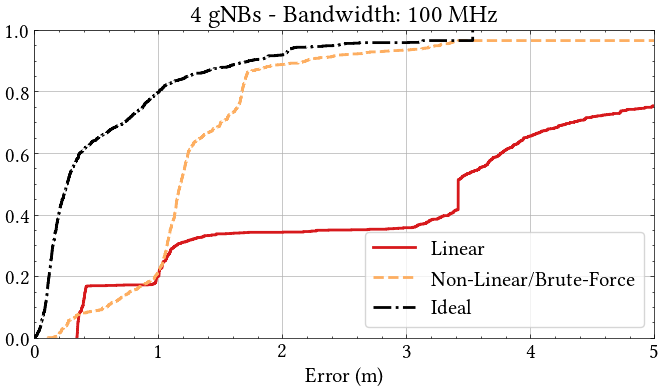

In [30]:
with plt.style.context(['science','acm']):
    plt.rcParams.update({'figure.dpi': '100'})
    plt.rcParams.update({'font.size': 15})
    f, ax = plt.subplots(figsize=(8,4))

    ax.ecdf(eelin, linewidth=2.0)
    ax.ecdf(eenli, linewidth=2.0)
    ax.ecdf(eidea, linewidth=2.0, color='black', linestyle='-.')

    ax.set_xlim([0,5])
    ax.grid()

    ax.set_title(f'4 gNBs - Bandwidth: {frequency_mhz} MHz')
    ax.set_xlabel('Error (m)')
    ax.legend(['Linear', 'Non-Linear/Brute-Force', 'Ideal'], frameon=True)

    plt.savefig('../pics/comnets/linvsnon.pdf', format="pdf", bbox_inches='tight', dpi=200)
    plt.show()

## Different Windows

In [31]:
frequency_mhz = 100

with open(f'comnets_data/results/experiments/4_{frequency_mhz}mhz_window_1_s_1.pickle', 'rb') as p:
    data_1 = pickle.load(p)

with open(f'comnets_data/results/experiments/4_{frequency_mhz}mhz_window_5_s_1.pickle', 'rb') as p:
    data_5 = pickle.load(p)

with open(f'comnets_data/results/experiments/4_{frequency_mhz}mhz_window_10_s_1.pickle', 'rb') as p:
    data_10 = pickle.load(p)

with open(f'comnets_data/results/experiments/4_{frequency_mhz}mhz_window_50_s_1.pickle', 'rb') as p:
    data_50 = pickle.load(p)

In [32]:
e1 = np.array([])
e5 = np.array([])
e10 = np.array([])
e50 = np.array([])
eidea = np.array([])

for i in range(UEs.shape[0]):
    ue = UEs[i]
    n1 = data_1[f'P{i}','nonlin'][:,0:2]
    n5 = data_5[f'P{i}','nonlin'][:,0:2]
    n10 = data_10[f'P{i}','nonlin'][:,0:2]
    n50 = data_50[f'P{i}','nonlin'][:,0:2]
    ied = n50 - (np.mean(n50,axis=0) - ue)
    

    en1 = np.linalg.norm(ue-n1,axis=1)
    en5 = np.linalg.norm(ue-n5,axis=1)
    en10 = np.linalg.norm(ue-n10,axis=1)
    en50 = np.linalg.norm(ue-n50,axis=1)
    eide = np.linalg.norm(ue-ied,axis=1)

    e1 = np.append(e1, en1)
    e5 = np.append(e5, en5)
    e10 = np.append(e10, en10)
    e50 = np.append(e50, en50)
    eidea = np.append(eidea, eide)


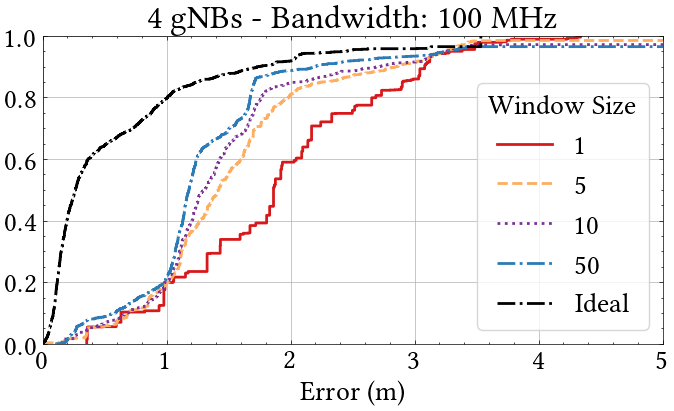

In [33]:
with plt.style.context(['science','acm']):
    plt.rcParams.update({'figure.dpi': '100'})
    plt.rcParams.update({'font.size': 20})
    f, ax = plt.subplots(figsize=(8,4))

    ax.ecdf(e1, linewidth=2.0, label='1')
    ax.ecdf(e5, linewidth=2.0, label='5')
    ax.ecdf(e10, linewidth=2.0, label='10')
    ax.ecdf(e50, linewidth=2.0, label='50')
    ax.ecdf(eidea, linewidth=2.0, label='Ideal', color='black', linestyle='-.')

    ax.set_xlim([0,5])
    ax.grid()

    ax.set_title(f'4 gNBs - Bandwidth: {frequency_mhz} MHz')
    ax.set_xlabel('Error (m)')
    ax.legend(title='Window Size', frameon=True, loc='lower right')

    plt.savefig('../pics/comnets/winsize.pdf', format="pdf", bbox_inches='tight', dpi=200)
    plt.show()

## 40 vs 100 MHz

In [55]:
frequency_mhz = 100
with open(f'comnets_data/results/experiments/3_{frequency_mhz}mhz_window_50_s_1.pickle', 'rb') as p:
        data100 = pickle.load(p)

frequency_mhz = 40
with open(f'comnets_data/results/experiments/3_{frequency_mhz}mhz_window_50_s_1.pickle', 'rb') as p:
        data40 = pickle.load(p)

In [56]:
ee100 = np.array([])
ee40 = np.array([])
eidea = np.array([])

for i in range(UEs.shape[0]):
    if frequency_mhz == 40 and i == 1:
        continue
    ue = UEs[i]
    n100 = data100[f'P{i}','nonlin'][:,0:2]
    n40 = data40[f'P{i}','nonlin'][:,0:2]
    ied = n100 - (np.mean(n100,axis=0) - ue)

    e100 = np.linalg.norm(ue-n100,axis=1)
    e40 = np.linalg.norm(ue-n40,axis=1)
    eide = np.linalg.norm(ue-ied,axis=1)

    ee100 = np.append(ee100, e100)
    ee40 = np.append(ee40, e40)
    eidea = np.append(eidea, eide)


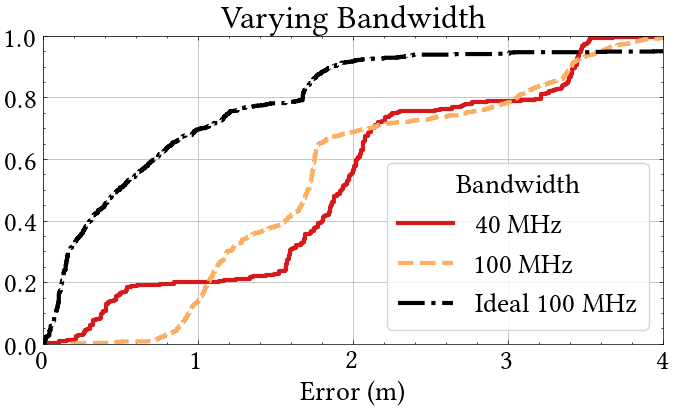

In [59]:
with plt.style.context(['science','acm']):
    plt.rcParams.update({'figure.dpi': '100'})
    plt.rcParams.update({'font.size': 20})    
    f, ax = plt.subplots(figsize=(8, 4))

    ax.ecdf(ee40, linewidth=3.0, label='40 MHz')
    ax.ecdf(ee100, linewidth=3.0, label='100 MHz')
    ax.ecdf(eidea, linewidth=3.0, label='Ideal 100 MHz', color='black', linestyle='-.')

    ax.set_xlim([0,4])
    ax.grid()

    ax.set_title(f'Varying Bandwidth - 3gNB')
    ax.set_xlabel('Error (m)')
    ax.legend(title='Bandwidth', frameon=True)

    # plt.savefig('../pics/comnets/oversample.pdf', format="pdf", bbox_inches='tight', dpi=200)
    plt.show()

## 3 vs 4 gNBs

In [34]:
frequency_mhz = 100

with open(f'comnets_data/results/experiments/4_{frequency_mhz}mhz_window_50_s_1.pickle', 'rb') as p:
    data_4 = pickle.load(p)

with open(f'comnets_data/results/experiments/3_{frequency_mhz}mhz_window_50_s_1.pickle', 'rb') as p:
    data_3 = pickle.load(p)

In [35]:
e3 = np.array([])
e4 = np.array([])
eidea = np.array([])

for i in range(UEs.shape[0]):
    ue = UEs[i]
    n3 = data_3[f'P{i}','nonlin'][:,0:2]
    n4 = data_4[f'P{i}','nonlin'][:,0:2]
    ied = n4 - (np.mean(n4,axis=0) - ue)

    en3 = np.linalg.norm(ue-n3,axis=1)
    en4 = np.linalg.norm(ue-n4,axis=1)
    eide = np.linalg.norm(ue-ied,axis=1)

    e3 = np.append(e3, en3)
    e4 = np.append(e4, en4)
    eidea = np.append(eidea, eide)

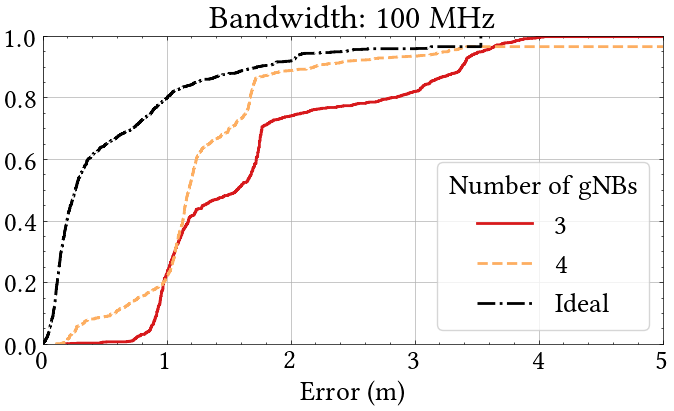

In [37]:
with plt.style.context(['science','acm']):
    plt.rcParams.update({'figure.dpi': '100'})
    plt.rcParams.update({'font.size': 20})
    f, ax = plt.subplots(figsize=(8,4))

    ax.ecdf(e3, linewidth=2.0, label='3')
    ax.ecdf(e4, linewidth=2.0, label='4')
    ax.ecdf(eidea, linewidth=2.0, label='Ideal', color='black', linestyle='-.')

    ax.set_xlim([0,5])
    ax.grid()

    ax.set_title(f'Bandwidth: {frequency_mhz} MHz')
    ax.set_xlabel('Error (m)')
    ax.legend(title='Number of gNBs', frameon=True, loc='lower right')

    plt.savefig('../pics/comnets/gnb3vs4.pdf', format="pdf", bbox_inches='tight', dpi=200)
    plt.show()

## Oversampling

In [38]:
frequency_mhz = 100

with open(f'comnets_data/results/oversampling/4_{frequency_mhz}mhz_window_50_s_1.pickle', 'rb') as p:
    data = pickle.load(p)


In [40]:
eenli_d = {}
eidea_d = {}
for os in [1,2,4]:
    eenli = np.array([])
    eeide = np.array([])
    for i in [0,4,5]:
        if os == 4 and i == 5:
            continue
        ue = UEs[i]
        nli = data[f'os{os}',f'P{i}','nonlin'][:,0:2]
        eid = nli - (np.mean(nli,axis=0) - ue)

        enli = np.linalg.norm(ue-nli,axis=1)
        eide = np.linalg.norm(ue-eid,axis=1)

        eenli = np.append(eenli, enli)
        eeide = np.append(eeide, eide)
    
    eenli_d[os] = eenli
    eidea_d[os] = eeide

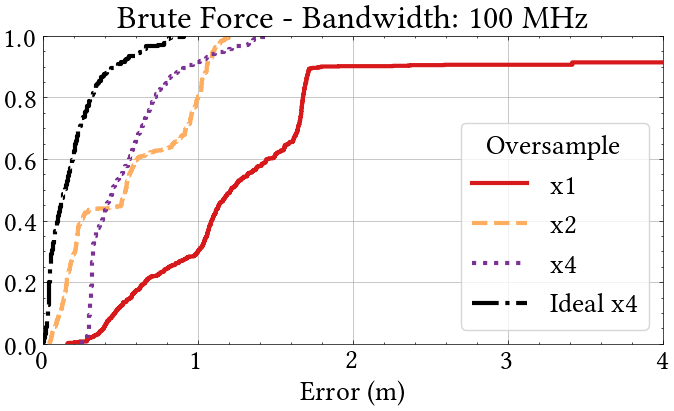

In [44]:
with plt.style.context(['science','acm']):
    plt.rcParams.update({'figure.dpi': '100'})
    plt.rcParams.update({'font.size': 20})    
    f, ax = plt.subplots(figsize=(8, 4))

    ax.ecdf(eenli_d[1], linewidth=3.0, label='x1')
    ax.ecdf(eenli_d[2], linewidth=3.0, label='x2')
    ax.ecdf(eenli_d[4], linewidth=3.0, label='x4')
    ax.ecdf(eidea_d[4], linewidth=3.0, label='Ideal x4', color='black', linestyle='-.')

    ax.set_xlim([0,4])
    ax.grid()

    ax.set_title(f'Brute Force - Bandwidth: {frequency_mhz} MHz')
    ax.set_xlabel('Error (m)')
    ax.legend(title='Oversample', frameon=True)

    plt.savefig('../pics/comnets/oversample.pdf', format="pdf", bbox_inches='tight', dpi=200)
    plt.show()

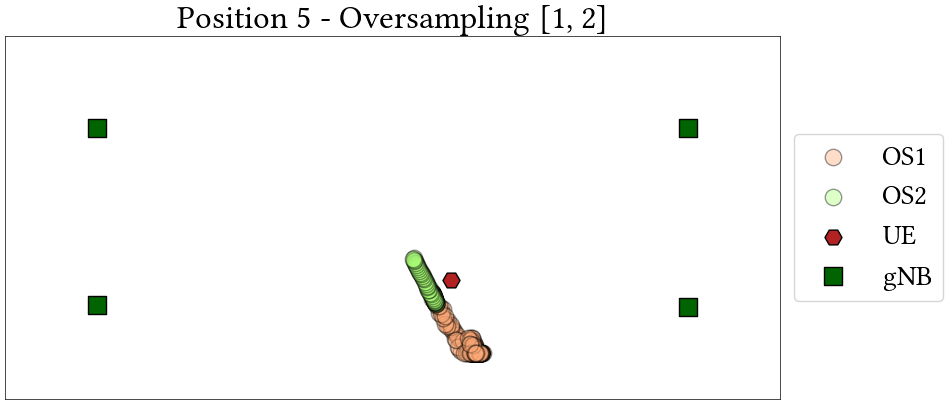

In [73]:
with plt.style.context(['science','acm']):
    plt.rcParams.update({'figure.dpi': '100'})
    plt.rcParams.update({'font.size': 20})

    pos, ovsm = 5,[1,2]
    fig, ax = plt.subplots(figsize=(10, 5))

    col = {1: '#ffaa77', 2: '#aaff77', 4: '#77aaff'}

    ax.set_xticks([])
    ax.set_yticks([])

    for os in ovsm:
        if os == 4 and pos == 5:
            continue
        pts = data[f'os{os}',f'P{pos}','nonlin']
        nlim = np.mean(pts,axis=0)
        # pts = pts + (ue - nlim)

        ax.scatter(pts[:,0], pts[:,1], 140, col[os], 'o', alpha=.4, edgecolors='black',label=f'OS{os}')  

    ax.scatter(UEs[pos,0],UEs[pos,1], 150, 'firebrick', 'H', edgecolors='black', label='UE')
    ax.scatter(gNBs[:,0], gNBs[:,1], 180, 'darkgreen', 's', edgecolors='black', label='gNB')
    ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), frameon=True)

    ax.set_xlim([np.min(gNBs[:,0])-2.0, np.max(gNBs[:,0])+2.0])
    ax.set_ylim([np.min(gNBs[:,1])-2.0, np.max(gNBs[:,1])+2.0])

    # ax.legend(('Results', 'UE', 'gNBs'), loc="center left", bbox_to_anchor=(1, 0.5))
    ax.set_title(f'Position {pos} - Oversampling {ovsm}')

    plt.gca().set_aspect('equal')
    plt.savefig(f'../pics/comnets/results_position{pos}.pdf', format="pdf", bbox_inches='tight', dpi=200)
    plt.show()